# Problem Statement

Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [5]:
type(load_boston)

function

In [6]:
load_boston

<function sklearn.datasets.base.load_boston(return_X_y=False)>

In [9]:
bos = load_boston()

In [11]:
boston = pd.DataFrame(bos.data)

In [16]:
boston.columns = bos.feature_names

In [29]:
boston.shape

(506, 13)

In [27]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
print(bos.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
bos.target.shape

(506,)

In [30]:
boston["Price"]=bos.target

In [31]:
boston.shape

(506, 14)

In [40]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [41]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [66]:
print("Price Pearson Correlation with CRIM : ",boston.CRIM.corr(boston.Price))
print("Price Pearson Correlation with INDUS : ",boston.INDUS.corr(boston.Price))
print("Price Pearson Correlation with CHAS : ",boston.CHAS.corr(boston.Price))
print("Price Pearson Correlation with NOX : ",boston.NOX.corr(boston.Price))
print("Price Pearson Correlation with RM : ",boston.RM.corr(boston.Price))
print("Price Pearson Correlation with AGE : ",boston.AGE.corr(boston.Price))
print("Price Pearson Correlation with RAD : ",boston.RAD.corr(boston.Price))
print("Price Pearson Correlation with DIS : ",boston.DIS.corr(boston.Price))
print("Price Pearson Correlation with TAX : ",boston.TAX.corr(boston.Price))
print("Price Pearson Correlation with PTRATIO : ",boston.PTRATIO.corr(boston.Price))
print("Price Pearson Correlation with B : ",boston.B.corr(boston.Price))
print("Price Pearson Correlation with LSTAT : ",boston.LSTAT.corr(boston.Price))

Price Pearson Correlation with CRIM :  -0.3883046085868113
Price Pearson Correlation with INDUS :  -0.4837251600283727
Price Pearson Correlation with CHAS :  0.17526017719029854
Price Pearson Correlation with NOX :  -0.42732077237328264
Price Pearson Correlation with RM :  0.6953599470715395
Price Pearson Correlation with AGE :  -0.3769545650045963
Price Pearson Correlation with RAD :  -0.38162623063977763
Price Pearson Correlation with DIS :  0.24992873408590388
Price Pearson Correlation with TAX :  -0.468535933567767
Price Pearson Correlation with PTRATIO :  -0.5077866855375617
Price Pearson Correlation with B :  0.33346081965706653
Price Pearson Correlation with LSTAT :  -0.7376627261740147


As we can see here that Price Co-relation with Feature RM(average number of rooms per dwelling) is 69

In [58]:
import seaborn as sns

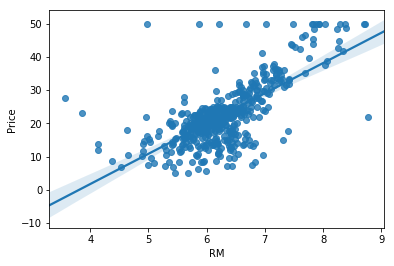

In [60]:
sns.regplot('RM','Price',data=boston)
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:
LR = LinearRegression()

In [77]:
X = boston.iloc[:,:len(boston.columns)-1].values
y = boston.iloc[:,-1].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
p_price = LR.predict(X_test)